### Motion Controls
##### Goal  
Modular Code So blocks for specific functions or buttons
First Identify What functions are necessary for experiment context

#### Features from LabView Code 

Accepts these Inputs:  
IP Address: 192.168.254.254  
Port No: 5001  
Timeout: 10,000  
GroupName: Group 1  
nbitems: 1  
TargetPosition:  
STOP BUTTON  

### Connect and Status

1. Create xps object and Checks group status below

In [1]:
%load_ext autoreload
%autoreload 2   

In [1]:
import sys
import os

# sys.path.append(r'C:\Users\ooa56\Documents\PLD_ControlSystem_Python')
sys.path.append(r'C:\Users\ooa56\Documents\PLD_ControlSystem_Python\PLD_ControlSystem_Python\src\pld_controlsystem_python')

In [ ]:

# from src.newportxps import NewportXPS

# xps = NewportXPS('192.168.254.254', username='Administrator', password='Administrator')

# print(xps.status_report())


In [ ]:
# xps.read_systemini()

Error Description:
ZM high level: This refers to the mechanical zero signal used with some stages. The ZM
signal is high during one part of the travel and low during the other part of the travel.
The detection of the ZM high/low transition in combination with an encoder index pulse
signal allows a fast and repeatable origin search
(MechanicalZeroAndIndexHomeSearch).

Do I need to resolve this error? Don't think so has not prevented the running of following commands



In [ ]:
# Print all stages configured on the controller
#for sname, info in xps.stages.items():
#    print(sname, xps.get_stage_position(sname), info)

Note:  To prevent following Error during Homing process. Ensure that within the stages.ini configuration file the Home Search Process Parameters are as below the maximum velocity is 40 Unit/Sec.  
SETTINGS:  
; --- Home search process parameters  
; --- <HomeSearch.MechanicalZeroAndIndexHomeSearch>  
HomeSearchSequenceType = MechanicalZeroAndIndexHomeSearch  
HomeSearchMaximumVelocity = 30 ; Unit/Sec  
HomeSearchMaximumAcceleration = 400 ; Unit/Sec²  
HomeSearchTimeOut = 10 ; Sec  
HomingSensorOffset = 0 ; Unit  

### Initialize and Home

2. Now Initialize Group  
Notes:  
Initializing the group (turning the motor on) causes the stage to move.  
Have not neccessarily observed pattern in how much the stage moves or even the direction it moves.  
Comparing the command above and below to check the position of the group shows the change.
AFter initializing group Status is in Not Referenced State


In [ ]:
#if group status enabled then kill all groups else initialize group
# Remember to Kill Group before exiting or if the motor is still on
#xps.kill_group('Group1')

# Turns on the servo Motor for the specified group and home the stage
#xps.initialize_group('Group1', with_encoder=True, home=True, with_raise=True)

In [ ]:
# Print all groups configured on the controller
#for gname, info in xps.groups.items():
#    print(gname, info)

In [ ]:
# Note Turning the servo on will cause the stage to move the stage position
# Check to make sure that these functions perform as expected
#print('Where Group1.Pos is', xps.get_stage_position('Group1.Pos'), info)
# print(xps.get_group_status())

### Move Motion Stage

In [ ]:
# Move the stage to a new position. Default is absolute motion can optionally set the motion to relative by relative=True
# xps.move_stage('Group1.Pos', 10.0)


## start here
#### TESTING FUNCTIONS FROM SIMPLIFIED CONTROLLER SCRIPT

In [ ]:
import motion_ctrl as mc

In [ ]:
# Initialize motion controller with host IP address and optional group name
controller = mc.MotionController('192.168.254.254', username='Administrator', password='Administrator')


The initialize and Home function Initializes and homes all the groups connected to the controller.

In [ ]:

# Initialize and home the motion controller
controller.initialize_and_home()


Motion controller response message:

- 
#XPS host: 192.168.254.254 (XPS-1871) # Firmware: XPS-RL-D-N16002 # Current Time: Thu Aug 15 15:43:25 2024 # Last Reboot: Sat May 25 13:03:15 2024 # Trajectory Group: None # Groups and Stages Group1 (singleaxisinuse), Status: Ready state from homing Stages: Group1.Pos (ILS@ILS200LM@XPS-DRV02) Hardware Status: First driver powered on - ZM low level Positioner Errors: OK

- XPS Error When the group already initialized
XPSError: message= homing group 'Group1', error=-26, description=Kill command or Emergency signal : check each positioners and each slave positioners, check that motion does not exceed software limits when combined with mapping and other features.
 'Group1' already initialized so will kill and reinitialize 

The set_position function currently needs the name of the Stage to be specified but I can hard code this to be the first stage name  this to be the first stage name.

In [ ]:

# Set position of a stage
controller.set_position(stage="Group1.Pos", position=50.0)


In [ ]:
controller.get_position(stage="Group1.Pos")

In [ ]:

# Set velocity parameters for a stage
# Can be expanded to include acceleration and jerktime parameters
controller.set_velocity(stage="Group1.Pos", velocity=500.0, )


In [ ]:
controller.get_velocity(stage="Group1.Pos") 

In [ ]:
controller.set_position(stage="Group1.Pos", position=0.0)

In [ ]:

# Stop the motion controller
controller.stop_controller()

Motion controller response message:

 # XPS host: 192.168.254.254 (XPS-1871) # Firmware: XPS-RL-D-N16002 # Current Time: Thu Aug 15 15:38:14 2024 # Last Reboot: Sat May 25 13:03:12 2024 # Trajectory Group: None # Groups and Stages Group1 (singleaxisinuse), Status: Not initialized state due to a GroupKill or KillAll command Stages: Group1.Pos (ILS@ILS200LM@XPS-DRV02) Hardware Status: ZM low level Positioner Errors: OK

## Attenuator Controls

## Troubleshooting attempt ##
1. Take Pictures of current state of controller wiring
2. Examine Attenuator Schematics understand them in relation to the physical system

Today: First tried to run commands above again and got the same response of the cell continuously running. Then tried uploading the Arduino sketch to the controller through the Arduino IDE unsuccessfully.

Will proceed with initial plan to resolve the unresponsiveness of the controller.

06/03/24- Problem Resolved. 
- Created new python script with attenuator controls based on Labview set-up. 
- Gained better undertanding of the labview blocks. 
- Attenuator now responds to commands.

In [ ]:
import attenuator_ctrl as ac

In [ ]:
laser = ac.AttenuatorControls(port='COM6')


### IMPORTANT NOTE:

Because of how the ATmega328p microcontroller was preprogrammed it does not have any explicit VISA read guideline for me to structure my code around.
Therefore making it hard to confirm when commands are sent beyond looking at the attenuuator in person.

CONTACT RYAN


In [ ]:
angle = 50
speed = 4
laser.home_attenuator()


In [ ]:
# Execute the sequence of operations
laser.rotate_to_angle(angle)


In [ ]:
laser.clear_laser()


In [ ]:
laser.block_laser()


In [ ]:
laser.home_attenuator()
laser.set_rotation_speed(speed)

# Close the serial connection
laser.close()


#### _Attenuator Control System integration with Panel_

Created a new script called 'attenuator_panel.py'. 

In this script:
- Initial AttenuatorControls class from the initial script, 'attenuator_ctrl.py', included.
- Resolved the issues with COM Port Permissions error by ensuring that the class was not initialized with any explicit ports when the application server is launched.

Running the Panel
- Standalone Script: Running the script as a standalone Python file will start a web server and open the GUI in your default browser.
- Jupyter Notebook: If you prefer running in a Jupyter notebook, the attenuator_controls.show() function will display the panel within the notebook.

In [ ]:
import importlib
import attenuator_panel as ap
from attenuator_panel import AttenuatorControls
importlib.reload(ap)

## Target Controls

The carousel responds to commands.

In [ ]:
import target_ctrl as tc

In [ ]:
carousel = tc.TargetControls(port='COM7')



In [ ]:

angle = 40
speed = 5


In [ ]:
# Execute the sequence of operations
carousel.step_raster_cw()

In [ ]:
carousel.step_raster_ccw()

In [ ]:
carousel.home_raster()


In [ ]:
carousel.set_raster_speed(speed)


In [ ]:
carousel.start_raster(45)


In [ ]:
carousel.stop_raster()


In [ ]:
carousel.start_rotate()


In [ ]:
carousel.stop_rotation()


In [ ]:
carousel.rotate_to_angle(angle)
carousel.set_rotation_speed(speed)
carousel.move_to_target(1)

# Close the serial connection
carousel.close()
 

## Vacuum Controls


In [ ]:
import vacuum_ctrl as vc
from pfeiffer_vacuum_protocol import PfeifferVacuumProtocol as pvp

In [ ]:
vac = vc.VacuumControls(port='COM6', baudrate=9600)

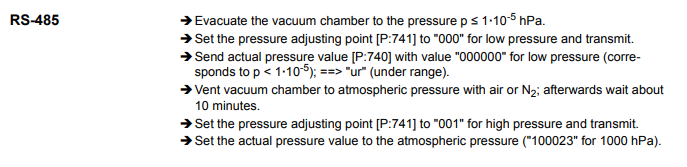

In [ ]:
vac.read_pressure()


In [ ]:
print(vac.read_error())


In [ ]:
# req=pvp._send_data_request(vac.ser,1, 740)
# raddr, rw, rparam_num, rdata = pvp._read_gauge_response(vac.ser, valid_char_filter=None)
# print(rdata)
# print(req)

In [ ]:
# addr =1
# param_num = 740
# c = "{:03d}00{:03d}02=?".format(addr, param_num)
# c += "{:03d}\r".format(sum([ord(x) for x in c]) % 256)

# print(c)

In [ ]:
# 
vac.pressure_setpoint('0')
vac.read_pressure()

In [ ]:
print(vac.correction_factor())


In [ ]:
vac.correction_factor(1.0)
print(vac.correction_factor())


In [ ]:
vac.close()

### Temperature Controls

Troubleshooting: 
Issues:
- Unable to establish connection betwen computer and temperature controller.
Possible reasons: 
Connector incompatibility: RS232 vs RS485 interface configuration. 

Issue Resolution:
- The salient issue ws the physical connection between the temp controller and computer.
- The adapter used to convert the 9-pin RS232 to USB had a RS485. So when I tried using existing python scripts and the existing LabView Driver with that adapter they didn't work.
- The solution directly connecting the 9-pin connector to the only serial port on the computer.

Takeaways:
- Looking up numbers on the cable and connector heads can help determine the wiring configuration, and cable type.
- The existing cables in the lab are null modem cables which do have RS232 physical configuration.
- When trying to establish a connection between hardware and computer, first eliminate posible wiring issues completely will save a lolt of time and headaches. 


Note Requires pip install of minimalmodbus.py 
eurotherm_source.py:

Note from Author of python script below, (script includes list of parameters):
- All class attribute are already available, but for commodity, I'm exposing here some of the most used parameters.
- All the other attributes can directly be called (read and written ) by instance.param

In [ ]:
import eurotherm_source as es

In [ ]:
tempctrl = es.eurotherm2408(serialPort='COM11', baudrate=9600)

In [ ]:
current_temperature = tempctrl.temperature

In [ ]:
tempctrl.workingSetpoint
tempctrl.power
tempctrl.manual
tempctrl.pid


In [ ]:
tempctrl.automatic


In [ ]:
tempctrl.resolution

In [ ]:
tempctrl.cutbackLow

In [ ]:
#tempctrl.setpoint
#tempctrl.setpoint = 23.7

In [ ]:
tempctrl.rampRate

In [ ]:
tempctrl.rampRate = 0.1

In [ ]:
tempctrl.setpoint

In [ ]:
tempctrl.temperature
tempctrl.rampUnit = 'min'
tempctrl.rampRate = 5
#seems like ramp rate setter is not working
tempctrl.rampRate

In [ ]:
tempctrl.programmerState
tempctrl.programmerState = 16

In [ ]:
tempctrl.close()

### Throttle Valve: Pressure Controls
MKS 651C Pressure Controller: Self Tuning 
#### Intro

The controller has a control range of $10^{-4}$ to 760 mTorr

The pressure units available include: Torr, mTorr, mbar, Pascal, kPa, $cmH_{2}O$, $H_2O$ 

There are 5 reprogrammable Setpoints

The following function are also available on the Front Panel: Valve Open, Valve Close, and Stop.

Before Running Script go throught the followign checklist:
- Go to computer device manger and confirm the COM Port number for the pressure controller.
- Make sure the key in the Front Panel of the pressure controller is turned to remote.

Manual was easy enough to find. 
Functions in python script are based on:
- RS232 formatting information can be found in Chapter 6 on page 64 
- the table of Commands can be found in Table 26 on page 132
- the table of Information requests can be found in Table 27 on page 138

08/01/24- No Response from Pressure Controller Troubleshooting

Excerpt from mks website

 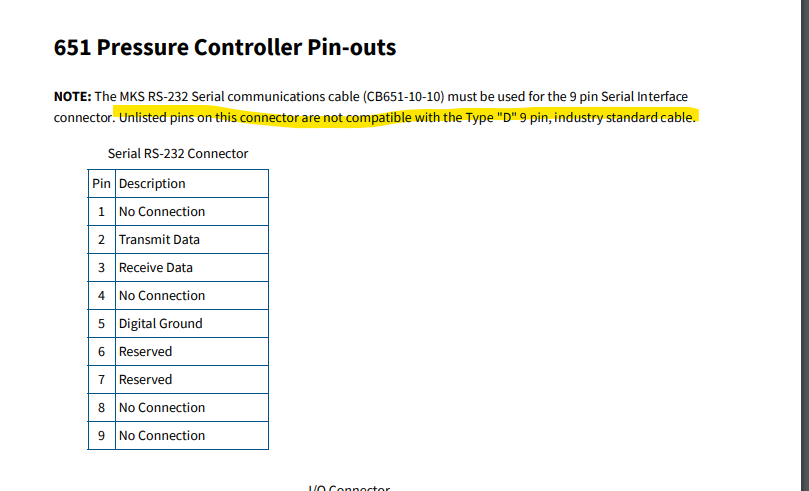
Highlighted sentence means: The statement warns that any pins on the connector that are not listed in the standard DB-9 pinout should not be assumed to be compatible with a standard DB-9 cable. These unlisted pins might have different functions, voltage levels, or could be used for proprietary purposes.


The following is the pin-out configuration for the USB2.0 to RS-232 adapter. Note pin 2 and pin 3 are flipped.

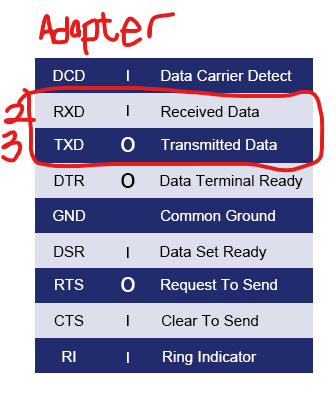


ANOTHER EXCERPT FROM THE 651C Manual

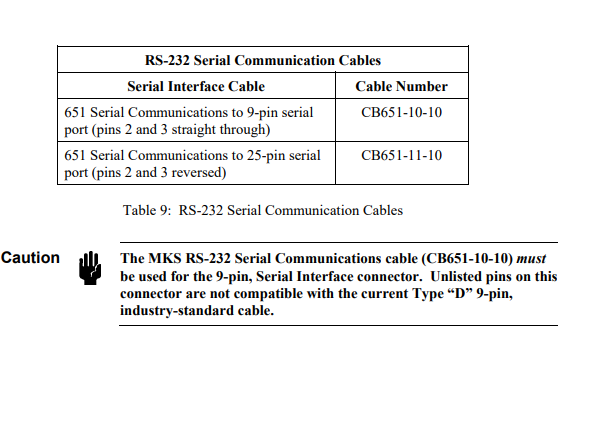

In [2]:
import pressure_ctrl as pc

In [6]:
pressurectrl = pc.PressureControls(port='COM12', baudrate=9600)

In [7]:
pressurectrl.software_version_request()

'No response'

In [7]:
pressurectrl.send_request('R38', 'H')

''

In [5]:
pressurectrl.close()

### Mass Flow Controls 

Found a github repository with python driver and command line tool

#### Installation
pip install alicat

Now to test this 

In [ ]:
from flowctrl_driver import FlowController 
import asyncio

Note the system uses Flow Controller not FlowMeter:

Multi-Variate output of:

    ○ Mass flow
    ○ Volumetric flow
    ○ Absolute pressure
    ○ Temperature
    ○ Setpoint

    """Get the current state of the flow controller.

    From the Alicat mass flow controller documentation, this data is:         * Pressure (normally in psia)
    * Temperature (normally in C)
    * Volumetric flow (in units specified at time of order)
    * Mass flow (in units specified at time of order)
    * Total flow (only on models with the optional totalizer function)
    * Currently selected gas

### Flow Controller 1

In [ ]:
import panel as pn
import serial.tools.list_ports
import asyncio
from flowctrl_driver import FlowMeter, FlowController


In [ ]:
async with FlowController('COM9') as flowcontroller1:
    print(await flowcontroller1.get())
    print(await flowcontroller1.get_firmware())
    print(await flowcontroller1._get_control_point())
    await flowcontroller1.close()

In [10]:
import serial

In [12]:
try:
        ser = serial.Serial(port='COM9')
        if ser.is_open:
            ser.close()
            print(f"Serial port {'COM9'} closed successfully.")
except serial.SerialException as e:
        print(f"Error closing port {'COM9'}: {e}")

Error closing port COM9: could not open port 'COM9': PermissionError(13, 'Access is denied.', None, 5)


### Flow Controller 2

In [ ]:
async with FlowController('COM10') as flowcontroller2:
    print(await flowcontroller2.get())

In [ ]:
async def get():
    async with FlowController('ip-address:port') as flow_controller:
        print(await flow_controller.get())

asyncio.run(get())

### Allowing Communication with Serial Hardware Devices

1. Ensure Docker Access to COM Ports:
On Windows, Docker runs containers within a virtual machine using Hyper-V or WSL2, which can limit direct access to serial ports. However, you can use certain configurations to expose COM ports to your container.

2. Identify the COM Ports:
First, identify the COM ports on your Windows machine that are connected to the hardware devices. You can do this by checking the Device Manager.

3. Map COM Ports to Docker Container:
To allow Docker to use the COM ports, you'll need to map the serial ports to the container. However, Docker for Windows does not directly support COM port forwarding. Instead, you can use a tool like socat to bridge the serial ports on Windows to the container.

Here’s a general approach:

- Step 1: Install socat on your Windows machine - You can use Cygwin or another Unix-like environment that supports socat.

- Step 2: Create a serial-to-TCP bridge - Use socat to forward the COM port data to a TCP port that Docker can access:

bash
CODE:
socat -d -d pty,raw,echo=0,link=/dev/ttyS10 tcp:localhost:5000

- Step 3: Start your Docker container - When you run your Docker container, expose the TCP port that socat is listening to:

bash
CODE:
docker run -it --rm --device /dev/ttyS10 --network="host" mycontainer
Alternatively, you can expose the TCP port directly:

bash
CODE:
docker run -it --rm --network="host" mycontainer
Inside the container, you can connect to the serial port over the TCP connection using tools like pySerial or directly with Python’s serial module:

python
CODE:
import serial

ser = serial.Serial('tcp://localhost:5000', baudrate=9600, timeout=1)
ser.write(b'Your command here')

4. Use --privileged and --device Flags (Alternative Approach for Linux based Docker):
If your Docker container needs direct access to serial devices and you are using WSL2 or Linux-based Docker, you can use the --privileged flag or --device flag:

bash
CODE:
docker run -it --rm --privileged -v /dev/ttyUSB0:/dev/ttyUSB0 mycontainer
or

bash
CODE:
docker run -it --rm --device=/dev/ttyUSB0 mycontainer


SOURCE: ChatGPT

### LPX200/ LPX305 Python Script Excution and Troubleshooting

Relevant Default Serial Communications Information:

Baud Rate: 9600

Data bits: 8 bits

Parity: None

Stop bits: 1 bit


Below is the RS232 log from a test run session to confirm RS232 serial commands can be sent from the PC to the Laser and responses can be sent back and read accurately:

<pre> ```16:12:47 +00:00.000   Session started

16:12:47 +00:00.020   [+] Opened port @002:002 IO Ninja Serial Tap baud: 9600 bps DTR: off RTS: on DSR: off CTS: on

16:18:12 +05:24.416 < 0000  0d 4d 4f 44 45 3f 0d                             .MODE?.

16:18:12 +05:24.420 > 0000  48 56 0d                                         HV.

16:19:35 +06:47.635 < 0000  4f 50 4d 4f 44 45 3f 0d                          OPMODE?.

16:19:35 +06:47.645 > 0000  4f 46 46 3a 33 31 0d                             OFF:31.

16:23:58 +11:10.543   Port closed``` </pre>



Some Notes to understand the log below:

1. First Number sequence separated with 2 semi colons represent the time stamp e.g. 16:51:37
2. Next number sequence starting with plus sign and separated with a semi-colon and a period represent the additional time
3. **<** represents the signal from PC control terminal to the laser controller software
4. **>** represents the signal from laser controller software to the PC control terminal {response}


`16:48:17 +00:00.000   Session started`

`16:48:17 +00:00.020   [+] Opened port @002:002 IO Ninja Serial Tap baud: 9600 bps DTR: off RTS: on DSR: off CTS: on`

**Pressed 'ENTER' button: which is equivalent to '0D' or '.' below which is the carriage return. This is a potential source of the error. No preset laser action for when only a carriage return is sent**

`16:51:37 +03:20.042 < 0000  0d                                               .`

**Pressed 'EXE' button: This sets the display text and sends 'EXE' as an executable command( 1 source of error)  which is equivalent to '0D' or '.' below which is the carriage return**

<pre> ```plaintext 16:51:37 +03:20.042 < 0000  0d 4d 4f 44 45 3f 0d                             .MODE?.

                16:51:37 +03:20.046 > 0000  48 56 0d                                         HV.

                16:51:37 +03:20.059 < 0000  52 45 50 52 41 54 45 3f 0d                       REPRATE?.

                16:51:37 +03:20.063 > 0000  31 0d                                            1.

                16:51:37 +03:20.072 < 0000  48 56 3f 0d                                      HV?.

                16:51:37 +03:20.077 > 0000  31 38 2e 30 0d                                   18.0.

                16:51:37 +03:20.088 < 0000  45 47 59 3f 0d                                   EGY?.

                16:51:37 +03:20.091 > 0000  30 0d                                            0.

                16:51:37 +03:20.105 < 0000  50 52 45 53 53 55 52 45 3f 0d                    PRESSURE?.

                16:51:37 +03:20.114 > 0000  33 36 33 32 0d                                   3632.

                16:51:37 +03:20.124 < 0000  4d 65 6e 75 3f 0d                                Menu?.

                16:51:37 +03:20.141 > 0000  32 20 32 34 38 6e 6d 20 4b 72 46 20 20 0d        2 248nm KrF  .

                17:01:26 +13:08.962 < 0000  45 58 45 0d 4d 4f 44 45 3f 0d                    EXE.``` </pre>

**Pressed 'EXE' button: This sets the display text and doesn't quite send the 'EXE' command but enters the characters for 'EXE' as an executable command( 1 source of error message). Note: line above for 'EXE' command. LINE BELOW: Then 'CLEAR' button pressed which clears the display and sets the display text.**

<pre> ```plaintext 17:01:26 +13:08.962 < 0000  45 58 45 0d 4d 4f 44 45 3f 0d                    EXE.MODE?.

                17:01:26 +13:08.966 > 0000  48 56 0d                                         HV.

                17:01:26 +13:08.980 < 0000  52 45 50 52 41 54 45 3f 0d                       REPRATE?.

                17:01:26 +13:08.983 > 0000  31 0d                                            1.

                17:01:26 +13:08.992 < 0000  48 56 3f 0d                                      HV?.

                17:01:26 +13:08.997 > 0000  31 38 2e 30 0d                                   18.0.

                17:01:26 +13:09.008 < 0000  45 47 59 3f 0d                                   EGY?.

                17:01:26 +13:09.011 > 0000  30 0d                                            0.

                17:01:26 +13:09.025 < 0000  50 52 45 53 53 55 52 45 3f 0d                    PRESSURE?.

                17:01:26 +13:09.033 > 0000  33 36 33 32 0d                                   3632.

                17:01:26 +13:09.044 < 0000  4d 65 6e 75 3f 0d                                Menu?.

                17:01:26 +13:09.059 > 0000  32 20 32 34 38 6e 6d 20 4b 72 46 20 20 0d        2 248nm KrF  .

                17:05:57 +17:40.279 < 0000  0d 4d 4f 44 45 3f 0d                             .MODE?.

                17:05:57 +17:40.284 > 0000  48 56 0d                                         HV.

                17:05:57 +17:40.298 < 0000  52 45 50 52 41 54 45 3f 0d                       REPRATE?.

                17:05:57 +17:40.300 > 0000  31 0d                                            1.

                17:05:57 +17:40.309 < 0000  48 56 3f 0d                                      HV?.

                17:05:57 +17:40.314 > 0000  31 38 2e 30 0d                                   18.0.

                17:05:57 +17:40.325 < 0000  45 47 59 3f 0d                                   EGY?.

                17:05:57 +17:40.328 > 0000  30 0d                                            0.

                17:05:57 +17:40.342 < 0000  50 52 45 53 53 55 52 45 3f 0d                    PRESSURE?.

                17:05:57 +17:40.351 > 0000  33 36 33 32 0d                                   3632.

                17:05:57 +17:40.361 < 0000  4d 65 6e 75 3f 0d                                Menu?.

                17:05:57 +17:40.377 > 0000  32 20 32 34 38 6e 6d 20 4b 72 46 20 20 0d        2 248nm KrF  .

                17:10:39 +22:22.437 < 0000  45 58 45 0d 4d 4f 44 45 3f 0d                    EXE.MODE?.

                17:10:39 +22:22.441 > 0000  48 56 0d                                         HV.

                17:10:39 +22:22.456 < 0000  52 45 50 52 41 54 45 3f 0d                       REPRATE?.

                17:10:39 +22:22.458 > 0000  31 0d                                            1.

                17:10:39 +22:22.467 < 0000  48 56 3f 0d                                      HV?.

                17:10:39 +22:22.473 > 0000  31 38 2e 30 0d                                   18.0.

                17:10:39 +22:22.483 < 0000  45 47 59 3f 0d                                   EGY?.

                17:10:39 +22:22.486 > 0000  30 0d                                            0.

                17:10:39 +22:22.500 < 0000  50 52 45 53 53 55 52 45 3f 0d                    PRESSURE?.

                17:10:39 +22:22.509 > 0000  33 36 33 32 0d                                   3632.

                17:10:39 +22:22.519 < 0000  4d 65 6e 75 3f 0d                                Menu?.

                17:10:39 +22:22.534 > 0000  32 20 32 34 38 6e 6d 20 4b 72 46 20 20 0d        2 248nm KrF  . ``` </pre>

